In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw

# Load Netowrk
import json

with open('Network.json', 'r') as infile:
    json_dict = json.load(infile)

G = nx.node_link_graph(json.loads(json_dict))


In [25]:
n

EdgeView([(22446549, 144240725), (22446549, 1733303), (22446549, 144988054), (22446549, 3241784), (144240725, 1733303), (144240725, 144988054), (144240725, 3241784), (144240725, 50593657), (144240725, 1782658), (144240725, 2054860511), (144240725, 46886279), (144240725, 144065562), (144240725, 1729928), (144240725, 1743043), (144240725, 35497150), (144240725, 33570565), (144240725, 31796970), (144240725, 145192169), (144240725, 2618549), (144240725, 1388020502), (144240725, 2101349323), (1733303, 144988054), (1733303, 3241784), (1733303, 51965804), (1733303, 9957987), (1733303, 1710491), (1733303, 145192169), (1733303, 2939899), (1733303, 6541695), (1733303, 2152819906), (1733303, 31796970), (1733303, 8813467), (1733303, 2618549), (1733303, 1388020502), (1733303, 40798235), (1733303, 35589613), (1733303, 2101349323), (1733303, 3068033), (1733303, 1826736), (1733303, 2146531), (1733303, 2698329), (1733303, 38451921), (1733303, 1993659), (1733303, 3020008), (1733303, 2222586), (1733303, 

#### Visualize

1210

In [47]:
largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc).copy()



In [48]:
network, config = nw.interactive.visualize(G_sub)

#### Random Networks

$<L> = p \frac{N(N-1)}{2} $

In [24]:
n_edges_css = G.number_of_edges()
n_nodes_css = G.number_of_nodes()
p = 2/((n_nodes_css-1)*n_nodes_css) * n_edges_css

print('p = ', p)

p =  0.004785048773318568


In [80]:
# Create a random graph

G_random = nx.erdos_renyi_graph(n_nodes_css, p)

largest_cc = max(nx.connected_components(G_random), key=len)
G_random_sub = G_random.subgraph(largest_cc).copy()


network, config = nw.interactive.visualize(G_random)


 2.2 Degree dist

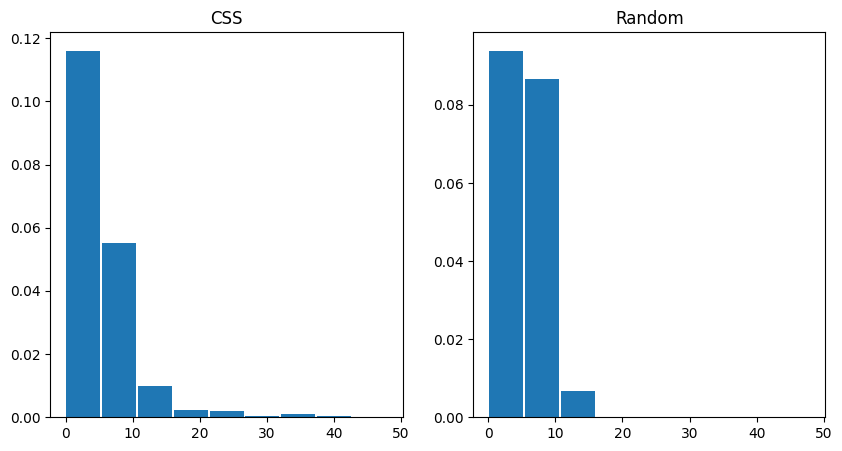

In [70]:
# Compare the two networks degree distributions on Normal Scale

degree_css = [val for (node, val) in G.degree()]
degree_random = [val for (node, val) in G_random.degree()]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

bins = np.linspace(min(min(degree_css),min(degree_random)), max(max(degree_css),max(degree_random)), 10)

hist_css,edges_css = np.histogram(degree_css, bins=bins,density=True)
hist_random, edges_random = np.histogram(degree_random, bins=bins, density=True)

x_css = (edges_css[1:]+edges_css[:-1])/2
x_random = (edges_random[1:]+edges_random[:-1])/2

width = (bins[1]-bins[0] ) *0.95

ax[0].bar(x_css, hist_css, width=width)
ax[0].set_title('CSS')

ax[1].bar(x_random, hist_random, width=width)
ax[1].set_title('Random')

plt.show()


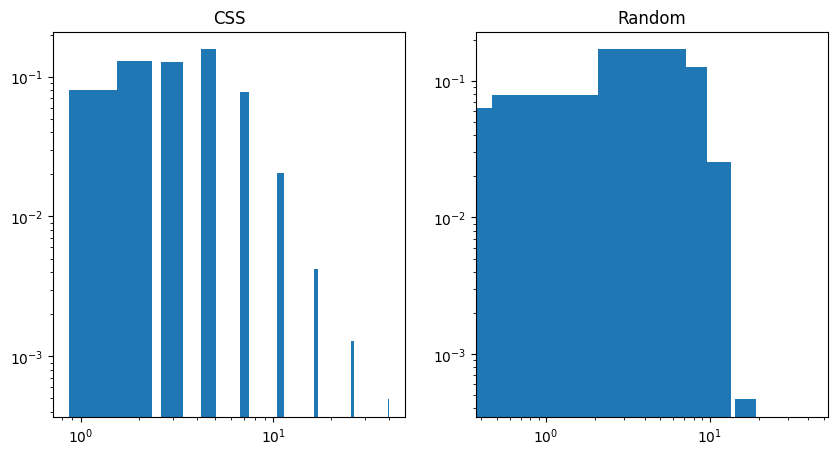

In [76]:
# Compare the two networks degree distributions on log-log scale

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

bins = np.logspace(0, np.log10(max(max(degree_css),max(degree_random))), 10)

hist_css,edges_css = np.histogram(degree_css, bins=bins,density=True)
hist_random, edges_random = np.histogram(degree_random, bins=bins, density=True)

x_css = (edges_css[1:]+edges_css[:-1])/2
x_random = (edges_random[1:]+edges_random[:-1])/2


ax[0].bar(x_css, hist_css)
ax[0].set_title('CSS')

ax[1].bar(x_random, hist_random, width=width)
ax[1].set_title('Random')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.show()



2.3 Shortest Path

In [81]:
print("Shortest Path CSS:", nx.average_shortest_path_length(G_sub))
print("Shortest Path Random:", nx.average_shortest_path_length(G_random_sub))   

Shortest Path CSS: 7.777336556946752
Shortest Path Random: 4.1543596035345525


In [112]:
# Function to calculate the clustering coefficient of a network

def clustering_coefficient(G):
    cc_s = []
    for node in G.nodes():
        
        Triangles = []
        
        neighbors_main = [n for n in G.neighbors(node)]
        n_neighbors = len(neighbors_main)

        for neighbor in neighbors_main:
            neighbor_neighbors = G.neighbors(neighbor)
            
            for nn in neighbor_neighbors:
                if nn in neighbors_main:
                    if (nn, neighbor) not in Triangles and (neighbor, nn) not in Triangles:
                        Triangles.append((nn, neighbor))

        if n_neighbors < 2:
            cc_s.append(0)
        else:
            possible_triangles = n_neighbors*(n_neighbors-1)/2
            cc_s.append(len(Triangles)/possible_triangles)
                
    return np.mean(cc_s)



In [113]:
print("Clustering Coefficient CSS:", clustering_coefficient(G_sub))
print("Clustering Coefficient Random:", clustering_coefficient(G_random_sub))

Clustering Coefficient CSS: 0.8548309423388114
Clustering Coefficient Random: 0.00460403128452921


In [83]:
print("Clustering Coefficient CSS:", clustering_coefficient(G_sub))
print("Clustering Coefficient Random:", clustering_coefficient(G_random_sub))


Clustering Coefficient CSS: 0.8548309423388116
Clustering Coefficient Random: 0.0046040312845292055
